# **Import Packages & Dataset**

In [2]:
!pip install pycountry_convert --quiet
!pip install plotly --quiet
!pip install missingno --quiet

     |████████████████████████████████| 10.1 MB 9.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 297 kB 57.8 MB/s 
     |████████████████████████████████| 208 kB 57.9 MB/s 
     |████████████████████████████████| 297 kB 59.2 MB/s 
     |████████████████████████████████| 297 kB 60.6 MB/s 
     |████████████████████████████████| 296 kB 75.0 MB/s 
     |████████████████████████████████| 296 kB 44.0 MB/s 
     |████████████████████████████████| 280 kB 57.6 MB/s 
     |████████████████████████████████| 280 kB 43.5 MB/s 
     |████████████████████████████████| 280 kB 69.7 MB/s 
     |████████████████████████████████| 280 kB 70.3 MB/s 
     |████████████████████████████████| 279 kB 59.4 MB/s 
     |████████████████████████████████| 279 kB 58.0 MB/s 
     |████████████████████████████████| 272 kB 61.1 MB/s 
     |████████████████████████████████| 272 kB 60.5 MB/s 
    

In [3]:
# Main Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Special Library
import pycountry_convert as pc
import missingno as msno

# Seaborn Style
sns.set(color_codes = True)
sns.set_style("white")

In [4]:
# Load data from gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load dataframe
df =pd.read_csv("drive/My Drive/World Population Kaggle/world_population.csv")
df.head()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


**Data Inspection**

In [6]:
# Inspect the missing values 🐢
data_info= pd.DataFrame()
data_info['Column Names']= df.columns
data_info['Datatype'] = df.dtypes.to_list()
data_info['num_NA']= data_info['Column Names'].apply(lambda x: df[x].isna().sum())
data_info['%_NA']= data_info['Column Names'].apply(lambda x: df[x].isna().mean())
data_info

,Column Names,Datatype,num_NA,%_NA
0,Country/Other,object,0,0.000000
1,Population (2020),int64,0,0.000000
2,Yearly Change,float64,0,0.000000
3,Net Change,int64,0,0.000000
4,Density (P/Km²),int64,0,0.000000
5,Land Area (Km²),int64,0,0.000000
6,Migrants (net),int64,0,0.000000
7,Fert. Rate,float64,0,0.000000
8,Med. Age,int64,0,0.000000
9,Urban Pop %,float64,7,0.034826


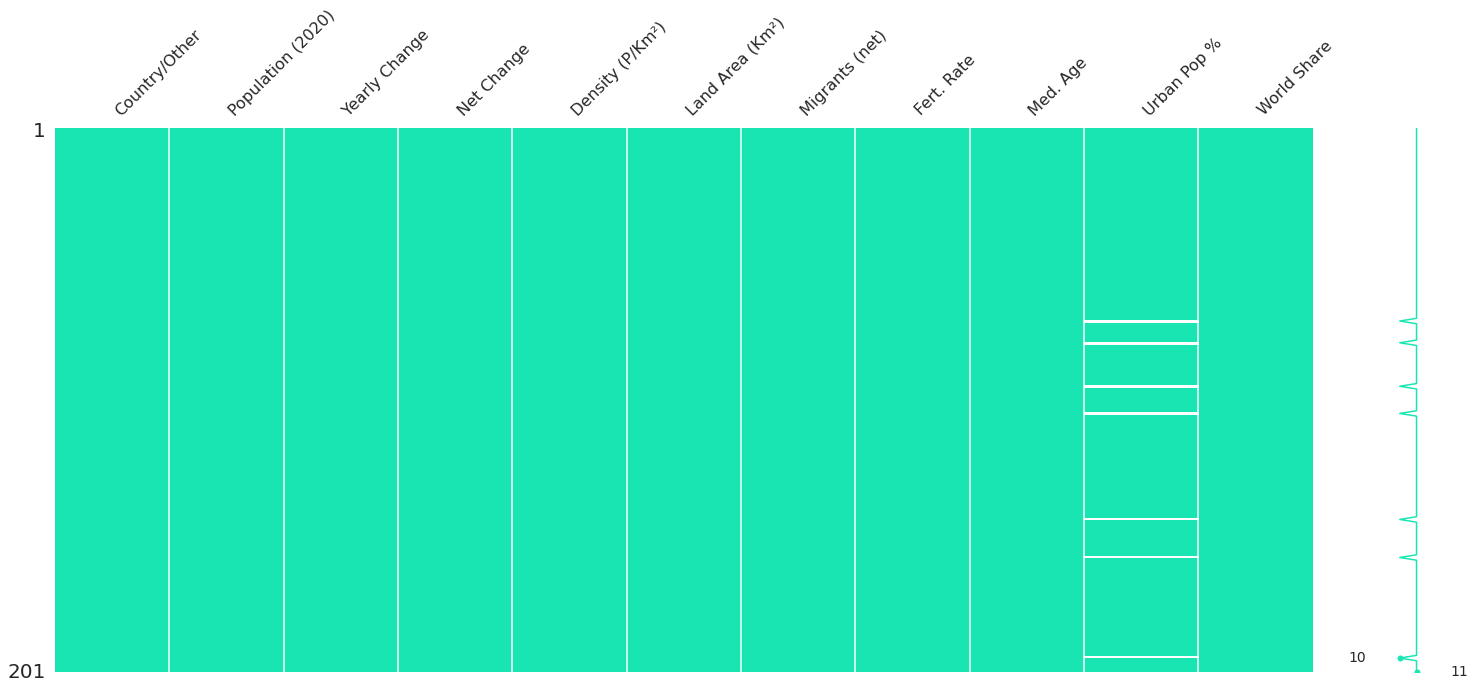

In [7]:
# Missing value matrix
msno.matrix(df,color=(0.1, 0.9, 0.7))
plt.show()

**Interpretasi:**
- Ada 7 missing value pada urban population %
- Datatypes layak digunakan

# **EDA - Exploratory Data Analysis**

**Data Correlations**

In [8]:
# Get correlations
df.corr()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Population (2020),1.000000,-0.033954,0.850314,-0.019811,0.448512,-0.267104,-0.048964,0.018756,-0.045453,0.999999
Yearly Change,-0.033954,1.000000,0.174783,-0.007646,-0.020720,-0.016140,0.823845,-0.843301,-0.352790,-0.033938
Net Change,0.850314,0.174783,1.000000,-0.027851,0.293919,-0.302158,0.166476,-0.192737,-0.174918,0.850165
Density (P/Km²),-0.019811,-0.007646,-0.027851,1.000000,-0.063196,0.000122,-0.151806,0.141109,0.006848,-0.019636
Land Area (Km²),0.448512,-0.020720,0.293919,-0.063196,1.000000,0.225448,-0.045421,0.062340,0.128382,0.448524
Migrants (net),-0.267104,-0.016140,-0.302158,0.000122,0.225448,1.000000,-0.113283,0.190539,0.270934,-0.266888
Fert. Rate,-0.048964,0.823845,0.166476,-0.151806,-0.045421,-0.113283,1.000000,-0.882396,-0.485951,-0.049104
Med. Age,0.018756,-0.843301,-0.192737,0.141109,0.062340,0.190539,-0.882396,1.000000,0.534106,0.018851
Urban Pop %,-0.045453,-0.352790,-0.174918,0.006848,0.128382,0.270934,-0.485951,0.534106,1.000000,-0.045258
World Share,0.999999,-0.033938,0.850165,-0.019636,0.448524,-0.266888,-0.049104,0.018851,-0.045258,1.000000


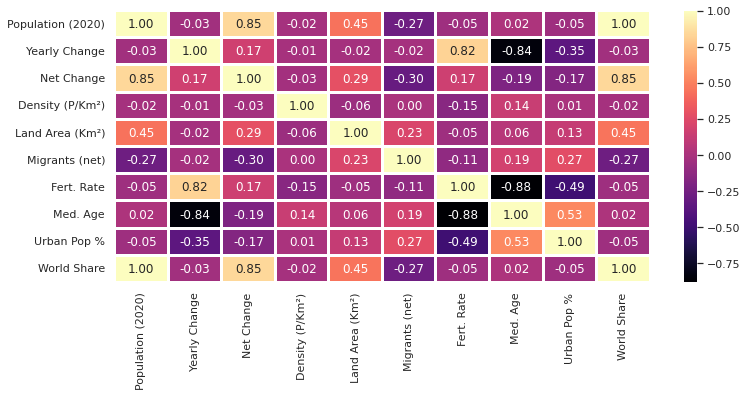

In [9]:
# Correlation in Dataset Heatmap
plt.figure(figsize = (12,5)) # Determine image size
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma', linewidths=2)
plt.savefig('Correlation_Heatmap.png')
plt.show()

# **Pengelompokan Benua**

**New Column Name**

In [10]:
# Changing column names
df.rename(columns = {'Country/Other':'Country'}, inplace = True)

**Add New Column**

In [11]:
# Adding a new column with country code
def countryCode (country_name):
    try:
        return pc.country_name_to_country_alpha2(country_name)
    except:
        return None                  # None keyword adds a null value

if __name__ == "__main__":
    df['Country code']= df.apply(lambda x: countryCode(x.Country), axis = 1)

In [13]:
# Adding a column with continent
def continent(country_code):
    try:
        return pc.country_alpha2_to_continent_code(country_code)
    except:
        return None                  # None keyword adds a null value
    
if __name__ == "__main__":
    df['Continent']= df["Country code"].apply(lambda x: continent(x))
df.head()

,Country,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Country code,Continent
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50,AF,AS
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04,AL,EU
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56,DZ,AF
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42,AO,AF
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00,AG,NA


**List of Continent Code:**

NA: North America

SA: South America

EU: Euroupe

AF: Africa

AS: Asia

OC: Oceania

In [14]:
# Save output to gdrive
path = '/content/drive/My Drive/world_pops_continent.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)